
# ¿Qué es la teoría de valores extremos?

La teoría de valores extremos trata de modelizar eventos muy raros. Tratamos de modelizar lo que es inusual frente a la estadística de frecuencias clásica que se ocupa de lo usual.

Por tanto, tenemos una teoría que trata de modelizar eventos que rara vez ocurren o que no han llegado a ocurrir.

Es una teoría relativamente reciente ya que se comenzó a desarrollar durante el siglo XX principalmente en la ingeniería civil. Los ingenieros deben diseñar estructuras que soporten los valores normales y los valores extremos a las que podrían llegar a estar sometidas esas mismas estructuras:

* Ocean engineering: Altura de ola
* Structural engineering: Terremotos
* Hydraulics engineering: Inundaciones
* Fatiga de elementos: Carga de trabajo
* ...

Al tratarse de valores extremos sabemos que esos eventos son muy escasos. Trataremos de extrapolar, a partir de los datos observados, otros datos más extremos que no han  sido observados. La teoría de valores extremos proporciona una serie de modelos que permiten llevar a  cabo esta extrapolación.

# Dos modelos clásicos principales

* ## Block Maxima + GEV 

* ## Peak-Over-Threshold + GPD

# Generalised Extreme  Value distribution (GEV) + Máximos por bloque

Las familias Gumbel, Frechet y Weibull se podrían combinar en una única familia de modelos cuya distribución sería:

$$G(z) = exp \{ - [ 1  + \xi (\frac{z - \mu}{\sigma}) ]^{\frac{-1}{\xi}} \}$$

Un caso especial de la GEV es el caso de Gumbel:

$$G(z) = exp [ -exp \{-(\frac{z - \mu}{\sigma})\}]$$

## Ejemplo

Imaginemos valores anuales de viento, los cuales se distribuyen según una distribución *Weibull*. Si extraemos los máximos anuales estos valores se ajustarán a GEV.

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

Definimos 100 distribuciones que contienen 8760 datos de valores horarios de velocidad (365 x 24) y nos quedamos solo con el valor máximo anual.

Imaginemos que la distribución Weibull tiene unos parámetros que varían entre:

$$ c \in [1.7, 2.4] $$

$$ A \in [6.5, 7.5] $$

In [2]:
data = np.empty((100, 8760))
c = np.random.uniform(1.7, 2.4, size = 100)
A = np.random.uniform(6.5, 7.5, size = 100)
for i in range(100):
    rv = stats.weibull_min(c[i], loc = 0, scale = A[i])
    data[i,:] = rv.rvs(size = 8760)

5.7866123367 5.90360351939
21.7784622549 17.0684385226


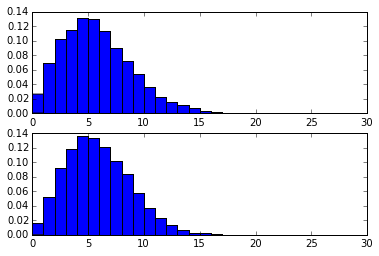

In [3]:
plt.subplot(211)
plt.hist(data[0,:], bins = np.arange(0,30), normed = True)
plt.subplot(212)
plt.hist(data[-1,:], bins = np.arange(0,30), normed = True)
print(np.mean(data[0,:]), np.mean(data[-1,:]))
print(np.max(data[0,:]), np.max(data[-1,:]))

Extraigo el valor máximo anual:

In [4]:
maximos = np.max(data, axis = 1)

In [5]:
print(maximos.shape, maximos)

(100,) [ 21.77846225  25.94386938  20.85421279  22.85189314  20.1432015
  21.16082679  20.68519816  21.88583233  20.86225341  18.70522644
  17.37957738  21.05284747  22.92874879  24.2015219   23.37768502
  23.14842582  17.67887109  25.64618228  19.58983524  22.80395124
  19.46834724  26.18428695  19.52411703  20.60067692  18.19018643
  17.93971962  20.46407858  18.87044637  18.10647809  20.71883241
  23.4849992   19.54353904  18.89156743  17.5643611   21.93276973
  21.46061479  18.56932146  19.8306878   19.28910016  19.83823573
  17.28383042  21.39777503  24.34955476  20.89062463  17.09695031
  19.59298127  21.19240376  22.74033225  25.97133912  16.4726814
  21.24016959  26.09995791  23.47415352  24.59427923  24.40762098
  22.60361179  20.21623942  19.06600336  21.24397432  16.91986174
  18.14441053  20.55009497  18.39475613  19.57266889  19.68403131
  20.52052537  21.45932522  21.53997746  29.21391361  22.00965311
  21.18326769  23.32435987  20.0598052   26.9525637   21.84522079
  29.

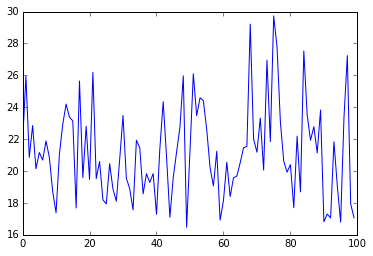

In [6]:
plt.plot(maximos)

In [7]:
params = stats.genextreme.fit(maximos)
print(params)

(0.051919589934687205, 19.901955283039896, 2.4304241412327183)


((array([ 15.83542432,  16.35124666,  16.66701183,  16.90430481,
          17.09907246,  17.26682772,  17.41578331,  17.55085102,
          17.67521933,  17.79108435,  17.90002817,  18.00323156,
          18.10160132,  18.19585059,  18.28655145,  18.37417081,
          18.4590954 ,  18.5416498 ,  18.6221096 ,  18.70071127,
          18.77765965,  18.85313372,  18.92729117,  19.00027195,
          19.07220115,  19.14319135,  19.2133445 ,  19.28275348,
          19.35150345,  19.41967289,  19.48733459,  19.55455636,
          19.62140177,  19.68793072,  19.75419993,  19.8202634 ,
          19.88617281,  19.95197787,  20.01772663,  20.08346576,
          20.14924086,  20.21509662,  20.28107714,  20.34722609,
          20.4135869 ,  20.48020301,  20.54711804,  20.61437597,
          20.68202134,  20.75009946,  20.81865657,  20.88774011,
          20.95739885,  21.02768319,  21.09864536,  21.17033969,
          21.24282288,  21.31615432,  21.3903964 ,  21.46561487,
          21.54187928,  2

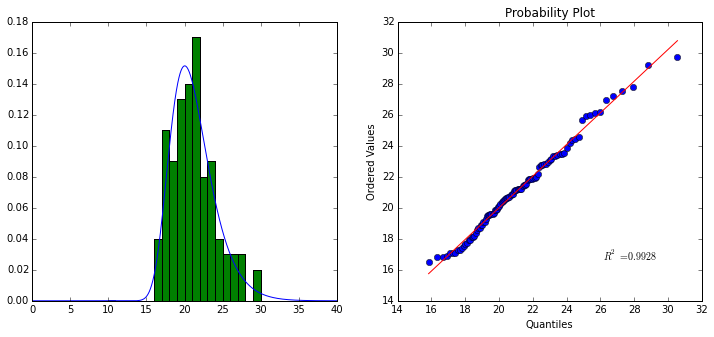

In [8]:
plt.figure(figsize = (12,5))
plt.subplot(121)
plt.plot(np.arange(0,40,0.01), 
         stats.genextreme.pdf(np.arange(0,40,0.01), *params))
plt.hist(maximos, bins = np.arange(10,35), normed = True)
plt.subplot(122)
stats.probplot(maximos, sparams = params, dist="genextreme", plot = plt)

Si consideramos que el parámetro de forma es 0 (Caso Gumbel) tendríamos el siguiente ajuste:

In [9]:
params = stats.genextreme.fit(maximos, f0 = 0)
print(params)

(0, 19.834302325422833, 2.3881723495583653)


/home/kiko/pyprojs/venv-scipy/lib/python3.4/site-packages/scipy/stats/_continuous_distns.py:1544: RuntimeWarning: invalid value encountered in true_divide
  logpex2 = where((c == 0)*(x == x), -x, logex2/c)


/home/kiko/pyprojs/venv-scipy/lib/python3.4/site-packages/scipy/stats/_continuous_distns.py:1557: RuntimeWarning: invalid value encountered in true_divide
  return where((c == 0)*(x == x), x, -special.expm1(-c*x)/c)


((array([ 16.00258753,  16.47131106,  16.76061913,  16.97923382,
          17.15945019,  17.31524029,  17.45401527,  17.58021453,
          17.6967239 ,  17.80553349,  17.90807865,  18.00543185,
          18.09841762,  18.18768509,  18.27375561,  18.35705515,
          18.43793701,  18.51669807,  18.59359077,  18.66883204,
          18.7426101 ,  18.81508975,  18.88641643,  18.9567195 ,
          19.02611487,  19.09470713,  19.16259124,  19.229854  ,
          19.29657523,  19.36282876,  19.42868332,  19.4942032 ,
          19.55944892,  19.62447778,  19.68934428,  19.75410058,
          19.81879684,  19.88348157,  19.94820194,  20.01300401,
          20.07793302,  20.14303362,  20.20835008,  20.27392649,
          20.33980702,  20.40603604,  20.47265838,  20.5397195 ,
          20.60726568,  20.67534428,  20.74400385,  20.81329445,
          20.88326783,  20.95397769,  21.02547992,  21.09783294,
          21.17109795,  21.2453393 ,  21.32062485,  21.3970264 ,
          21.4746201 ,  2

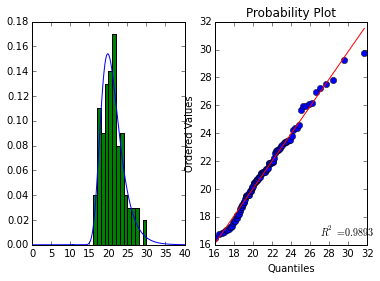

In [10]:
plt.subplot(121)
plt.plot(np.arange(0,40,0.01), 
         stats.genextreme.pdf(np.arange(0,40,0.01), *params))
plt.hist(maximos, bins = np.arange(10,35), normed = True)
plt.subplot(122)
stats.probplot(maximos, sparams = params, dist="genextreme", plot = plt)

Esta metodología tiene sus pegas:

* Es difícil obtener un periodo lo suficientemente largo y, por tanto, nuestra muestra será pequeña en laa mayoría de las ocasiones.
* Seleccionando bloques para extraer los máximos lo suficientemente largos puede provocar que estemos dejando fuera de la muestra algunos valores extremos independientes.
* Seleccionando bloques para extraer los máximos provoca que dejemos fuera muchos datos que podrían ser válidos.
* ...

# Generalised Pareto Distribution + modelo de umbrales

El modelo de umbrales o valores por encima de un umbral (POT o Peak-Over-Threshold en inglés) es más eficiente en el uso de los datos puesto que permite obtener valores extremos. Se define un valor umbral y se analizan los valores por encima de ese valor umbral.

La familia de distribuciones de Pareto se podría definir como:

$$ H(y) = 1 - (1 + \frac{\xi y}{\sigma + \xi (u - \mu)})^{\frac{-1}{\xi}} $$

Si los máximos por bloque tiene una distribución aproximada $G$, los valores por encima de un umbral tienen una distribución aproximada dentro de la familia generalizada de Pareto.

## Ejemplo

Vamos a seguir con nuestro ejemplo annterior de valores extremos de viento. Vamos a considerar como extremos los valores por encima de 18 m/s, por decir algo ¡¡¡y simplificando mucho!!!

$$ wind speed > 18 m/s $$

In [11]:
maximos2 = data[data > 18]

In [12]:
print(maximos2.shape, maximos2)

(1559,) [ 18.50259343  18.09413671  18.12107413 ...,  18.66320227  19.4685585
  18.02366627]


In [13]:
params = stats.genpareto.fit(maximos2, floc = 18)
print(params)

(-0.010235934491864199, 18, 1.6809345148285251)


/home/kiko/pyprojs/venv-scipy/lib/python3.4/site-packages/scipy/stats/_continuous_distns.py:1461: RuntimeWarning: divide by zero encountered in true_divide
  val = val + cnk * (-1) ** ki / (1.0 - c * ki)
/home/kiko/pyprojs/venv-scipy/lib/python3.4/site-packages/scipy/stats/_distn_infrastructure.py:915: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu * mu
/home/kiko/pyprojs/venv-scipy/lib/python3.4/site-packages/scipy/stats/_distn_infrastructure.py:2086: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


((array([ 18.00074736,  18.00181464,  18.00289409, ...,  28.3585102 ,
          29.09140279,  30.47505872]),
  array([ 18.0016155 ,  18.00231629,  18.00307227, ...,  27.80028559,
          29.21391361,  29.7295946 ])),
 (1.0056242670267901, -0.10894111219392499, 0.9995062243024857))

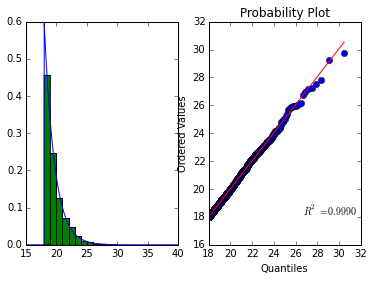

In [14]:
plt.subplot(121)
plt.xlim(15, 40)
plt.plot(np.arange(0,40,0.01), 
         stats.genpareto.pdf(np.arange(0,40,0.01), *params))
plt.hist(maximos2, bins = np.arange(18,35), normed = True)
plt.subplot(122)
stats.probplot(maximos2, sparams = params, dist="genpareto", plot = plt)

Esta metodología también tiene sus pegas:

* ¿Cuál es el valor umbral óptimo?
* ¿Los extremos seleccionados son i.i.d. (independientes e igualmente distribuidos)?
* ...

# Para mayor introducción teórica explicada de forma sublime.

* An introduction to the statistical modeling of extreme values. Stuart Coles (2001). Springer.

<center><img src="./static/ismev_book.jpg" /></center>

## Otros recursos

* An introduction to statistical modelling of extreme values: Application to calculate extreme wind speeds. Edward Omey, Fermin Mallor, Eulalia Nualart. HUB RESEARCH PAPER 2009/36, NOVEMBER 2009 (http://www.edwardomey.com/nonsave/MallorNualartOmeyExtremeWindSpeeds.pdf)

* Las clases del profesor Lee Fawcett (con ejemplos en R, http://www.mas.ncl.ac.uk/~nlf8/teaching/mas8391/). Tienen un libro a punto de salir para hacer cálculos de valores extremos con R que espero poder conseguir para continuar con el desarollo de la Teoría de Valores Extremos con Python.

# Librerías para hacer cálculo de valores extremos

Por desgracia, en Python no existe mucha información ni librerías. Lo que he mostrado antes en los ejemplos es la mayor parte de lo que se podría llegar a hacer con Python pero no existe una librería ***ad-hoc*** para ello y hay que ir rascando cositas de varios sitios.

## El panorama en R es infinitamente mejor

En R tenemos unas cuantas librerías para haccer cálculo de valores extremos. Entre las más importantes y completas tenemos:

* ismev (http://cran.r-project.org/web/packages/ismev/index.html)
* extRemes (http://cran.r-project.org/web/packages/extRemes/index.html)

Un resumen muy bueno sobre el mundo de valores extremos computacional lo podéis encontrar en un artículo publicado por el creador de la librería extRemes: 

* Gilleland, E., M. Ribatet and A. G. Stephenson, 2013: A software review for extreme value analysis. Extremes, 16 (1), 103 - 119, DOI: 10.1007/s10687-012-0155-0 ([pdf](http://download-v2.springer.com/static/pdf/628/art%253A10.1007%252Fs10687-012-0155-0.pdf?token2=exp=1432041326~acl=%2Fstatic%2Fpdf%2F628%2Fart%25253A10.1007%25252Fs10687-012-0155-0.pdf*~hmac=6f45fd3cd6acac221ed51b7d40146b39600d4d5bd1c0c961342e2c130034b5da)).

# Vamos a intentar solventar el problema en Python

## scikit-extremes

Análisis univariante de valores extremos con Python.

Características:

* Ajuste de parámetros por MLE, l-moments, Method of Moments,<span style="color: red;">***...***</span>
* Pruebas de bondad del modelo mediante gráficas (qq-plot, pp-plot, pdf modelo-histograma datos reales)
* Estimación de periodos de retorno
* Inclusión de datasets para testeo fácil
* Estimación de intervalos de confianza (método Delta, bootstrap paramétrico, <span style="color: red;">***profile likelihood***</span>,<span style="color: red;">***...***</span>)
* GEV, Gumbel, <span style="color: red;">***GPD***</span>,...
* Modelos para hacer cálculo con diferentes metodologías encontradas en la literatura para variables medioambientales, algunas de las cuales se considerar estándar de facto en algunos camps ingenieriles.
* Helpers para hacer <span style="color: red;">***declustering***</span>, <span style="color: red;">***mrl plot***</span>,...
* <span style="color: red;">***Otros modelos (r-largest order statistics, point process, bayesian inference,...)***</span>
* <span style="color: red;">***...***</span>

## Ejemplos de uso

In [15]:
import skextremes

skextremes depende de los siguientes paquetes (de momento):

* lmoments3
* numdifftools
* Además de numpy, scipy, matplotlib

### Block Maxima using GEV or Gumbel parametric models

Usamos los datos de Port Pirie

In [19]:
data = skextremes.datasets.portpirie()
print(data.description)
data = data.fields.sea_level


    Annual Maximum Sea Levels at Port Pirie, South Australia
    --------------------------------------------------------

    Fields:
     year: numpy.array defining the year for the row data.
     sea_level: numpy.array defining annual maximum sea level recorded at
        Port Pirie, South Australia.
     
    Source:
     -Coles, S. G. (2001). An Introduction to Statistical Modelling of 
        Extreme Values. London: Springer.
    


Ajustamos los datos usando los modelos paramétricos GEV y Gumbel contenidos en el módulo `distributions`. Usaremos el método de bootstrapping para calcular los intervalos de confianza ya que es el único disponibles en todos los métodos de ajuste de distribuciones incluidos por el momento (Maximum Likelihood Estimation (mle), method of moments (mom) y L-moments).

In [ ]:
gevmle = skextremes.distributions.GEV(data, fit_method = 'mle', frec = 1, ci = 0.05, ci_method = 'bootstrap')
gevmom = skextremes.distributions.GEV(data, fit_method = 'mom', frec = 1, ci = 0.05, ci_method = 'bootstrap')
gevlmo = skextremes.distributions.GEV(data, fit_method = 'lmoments', frec = 1, ci = 0.05, ci_method = 'bootstrap')

gummle = skextremes.distributions.Gumbel(data, fit_method = 'mle', frec = 1, ci = 0.05, ci_method = 'bootstrap')
gummom = skextremes.distributions.Gumbel(data, fit_method = 'mom', frec = 1, ci = 0.05, ci_method = 'bootstrap')
gumlmo = skextremes.distributions.Gumbel(data, fit_method = 'lmoments', frec = 1, ci = 0.05, ci_method = 'bootstrap')

Los estimadores (valores de los parámetros obtenidos) y los intervalos de confianza para cada uno de ellos los podemos obtener de la siguiente forma:

In [21]:
print("Data fitted with GEV model using mle")
print(gevmle.params)
print(gevmle.params_ci, '\n')

print("Data fitted with GEV model using mom")
print(gevmom.params)
print(gevmom.params_ci, '\n')

print("Data fitted with GEV model using lmoments")
print(gevlmo.params)
print(gevlmo.params_ci, '\n')

print("Data fitted with Gumbel model using mle")
print(gummle.params)
print(gummle.params_ci, '\n')
      
print("Data fitted with Gumbel model using mom")
print(gummom.params)
print(gummom.params_ci, '\n')

print("Data fitted with Gumbel model using lmoments")
print(gumlmo.params)
print(gumlmo.params_ci, '\n')

Data fitted with GEV model using mle
OrderedDict([('shape', 0.050109518363545352), ('location', 3.8747498425529501), ('scale', 0.19804394476624812)])
OrderedDict([('shape', (-0.13687955020756187, 0.26013138283145637)), ('location', (3.826565771702195, 3.9304189437758681)), ('scale', (0.15647154076812864, nan))]) 

Data fitted with GEV model using mom
OrderedDict([('shape', 0.083250000000000046), ('location', 3.8779709162520102), ('scale', 0.20502520488213954)])
OrderedDict([('shape', (-0.089710941910482594, 0.30657401658305627)), ('location', (3.8249905504325503, 3.9364151970896675)), ('scale', (0.16467512543049181, nan))]) 

Data fitted with GEV model using lmoments
OrderedDict([('shape', 0.05121183488734303), ('location', 3.8731476147228303), ('scale', 0.20322227162937134)])
OrderedDict([('shape', (-0.12347479480081147, 0.26050211875947543)), ('location', (3.8279927335270751, 3.9333953305952303)), ('scale', (0.16298245300855005, nan))]) 

Data fitted with Gumbel model using mle
Order

El pdf plot de cada uno de los ajustes será:

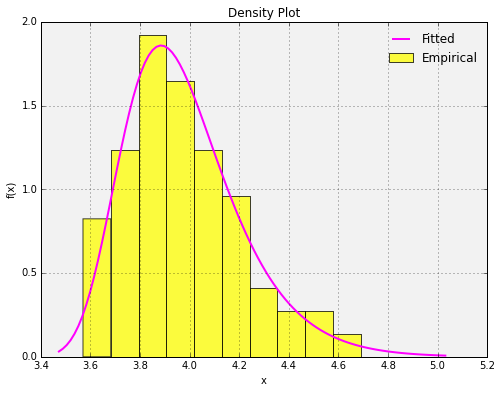

In [23]:
gevmle.plot_density()

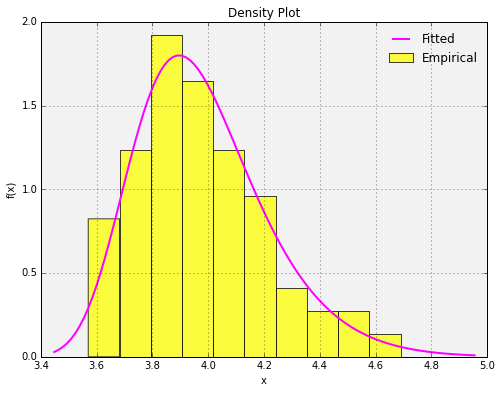

In [24]:
gevmom.plot_density()

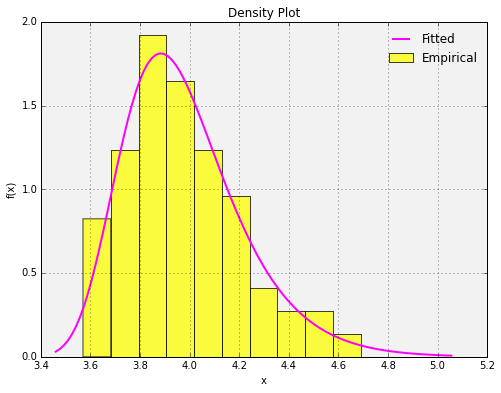

In [25]:
gevlmo.plot_density()

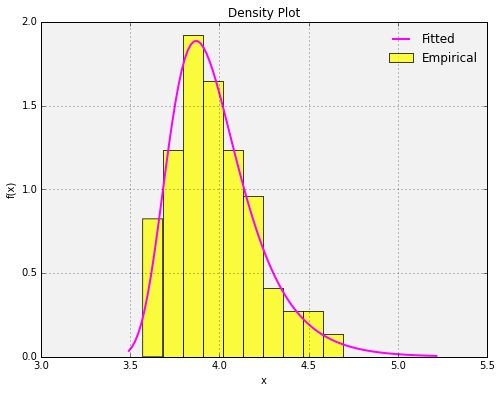

In [26]:
gummle.plot_density()

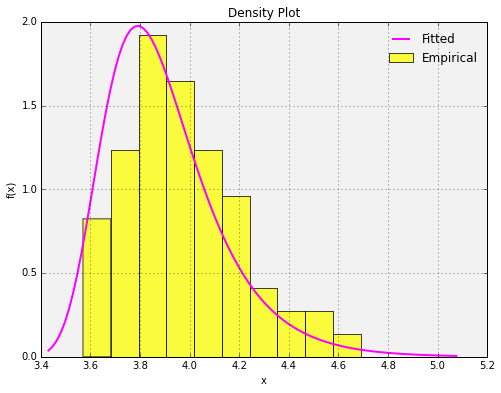

In [27]:
gummom.plot_density()

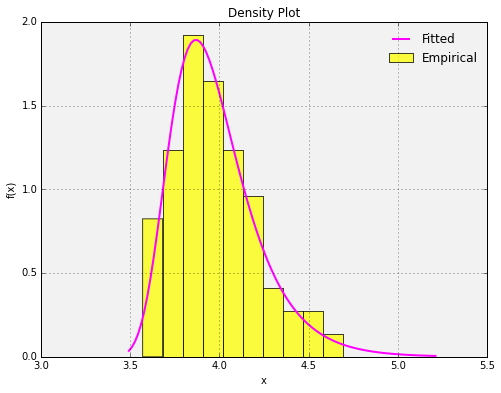

In [28]:
gumlmo.plot_density()

PP-plots

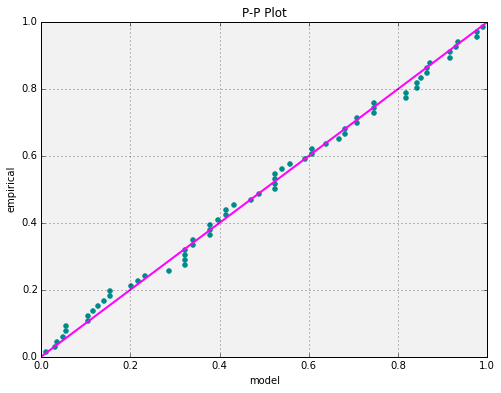

In [29]:
gevmle.plot_pp()
#gevmom.plot_pp()
#gevlmo.plot_pp()
#gummle.plot_pp()
#gummom.plot_pp()
#gumlmo.plot_pp()

QQ-plots de cada ajuste

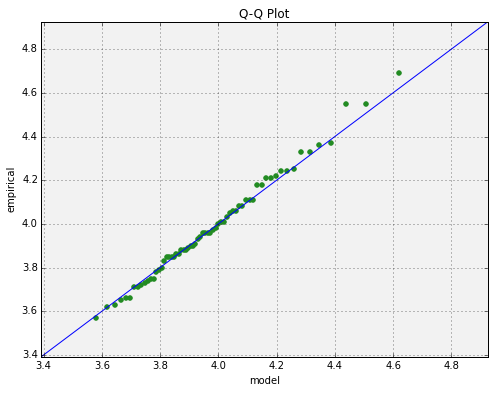

In [30]:
gevmle.plot_qq()
#gevmom.plot_qq()
#gevlmo.plot_qq()
#gummle.plot_qq()
#gummom.plot_qq()
#gumlmo.plot_qq()

Return values

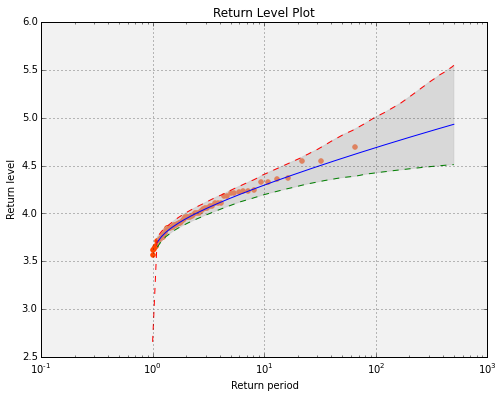

In [31]:
gevmle.plot_return_values()
#gevmom.plot_return_values()
#gevlmo.plot_return_values()
#gummle.plot_return_values()
#gummom.plot_return_values()
#gumlmo.plot_return_values()

Summary plots para cada ajuste

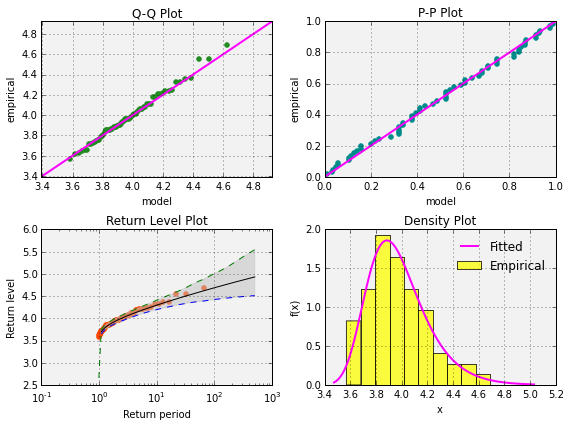

In [32]:
gevmle.plot_summary()
#gevmom.plot_summary()
#gevlmo.plot_summary()
#gummle.plot_summary()
#gummom.plot_summary()
#gumlmo.plot_summary()

# Block Maxima using Harris (1996) methodology

In [33]:
data = skextremes.datasets.harris1996()
print(data.description)
data = data.fields.harris1996


    Maximum hourly wind speed at Honington Station, UK
    --------------------------------------------------

    Fields:
     temp: numpy.array defining maximum hourly wind speed per year, in knots , 
         at Honington station, UK, over the period 1970 to 1990.
     
    Source:
     -Harris, R. I. (1996) "Gumbel re-visited - a new look at extreme value 
         statistics applied to wind speeds". Journal of Wind Engineering and
         Industrial Arodynamics 59, 1–22.
    


In [34]:
print(skextremes.standards.GumbelLiterature.__doc__)
h96 = skextremes.standards.GumbelLiterature(data, preconditioning = 2)
h96.ppp_harris1996()


    Calculate extreme values based on yearly maxima using several methodologies
    found in the literature using a least square fit.
    
    The methodologies differ in the location of the probability plotting 
    position.
    
    Each methodology to make the fit is defined in the methods ppp_method.
    
    Parameters
    ----------
    data : array_like
        Extreme values dataset.
    preconditioning : int or float
        You can choose to apply an exponent to the extreme data values before 
        performing the Gumbel curve fit. Preconditioning can often improve the 
        convergence of the curve fit and therefore improve the estimate T-year 
        extreme wind speed. Default value is 1.
    
    Methods
    -------
    Methods to calculate the fit:
        self.ppp_harris1996()
        self.ppp_lieblein()
        self.ppp_adamowski()
        self.ppp_beard()
        self.ppp_blom()
        self.ppp_gringorten()
        self.ppp_hazen()
        self.ppp_hirsch()
 

The resulting extreme value parameters are: *mode* of *271.6* $(m/s)^2$, $\alpha$ = *0.01437* $(m/s)^{-2}$, *characteristic product* of *3.903* and *weighted residual standard deviation* of *0.1686*.

In [35]:
paper_values = 3.903, 0.01437, 0.1686

print('\ndifferences in available values:')
print("Characteristic product : {0:}".format(h96.results['Harris1996']['characteristic product'] - paper_values[0]))
print("Alpha                  : {0:}".format(h96.results['Harris1996']['alpha'] - paper_values[1]))
print("Residual stddev        : {0:}".format(h96.results['Harris1996']['residual standard deviation'] - paper_values[2]))


differences in available values:
Characteristic product : 0.0012604178035968694
Alpha                  : 5.8113203979994615e-06
Residual stddev        : -9.916206024362939e-06


# GumbelLiterature class provides different ways to do a similar calculation like that performed by the Harris1996 method

Let's see how to perform the calculation using other methods and the same datased used by Harris1996:

In [36]:
print(skextremes.standards.GumbelLiterature.__doc__)


    Calculate extreme values based on yearly maxima using several methodologies
    found in the literature using a least square fit.
    
    The methodologies differ in the location of the probability plotting 
    position.
    
    Each methodology to make the fit is defined in the methods ppp_method.
    
    Parameters
    ----------
    data : array_like
        Extreme values dataset.
    preconditioning : int or float
        You can choose to apply an exponent to the extreme data values before 
        performing the Gumbel curve fit. Preconditioning can often improve the 
        convergence of the curve fit and therefore improve the estimate T-year 
        extreme wind speed. Default value is 1.
    
    Methods
    -------
    Methods to calculate the fit:
        self.ppp_harris1996()
        self.ppp_lieblein()
        self.ppp_adamowski()
        self.ppp_beard()
        self.ppp_blom()
        self.ppp_gringorten()
        self.ppp_hazen()
        self.ppp_hirsch()
 

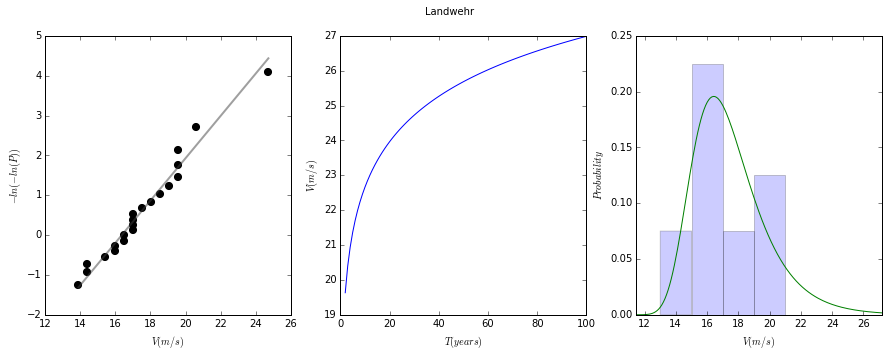

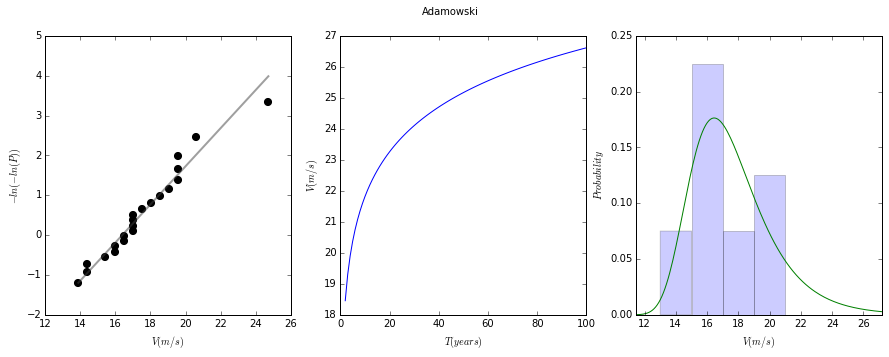

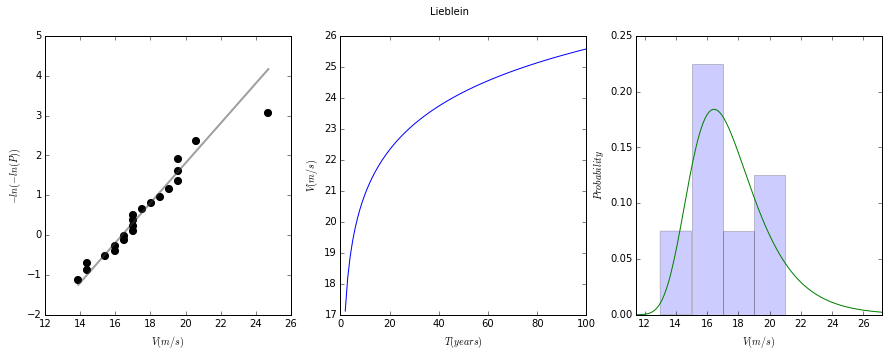

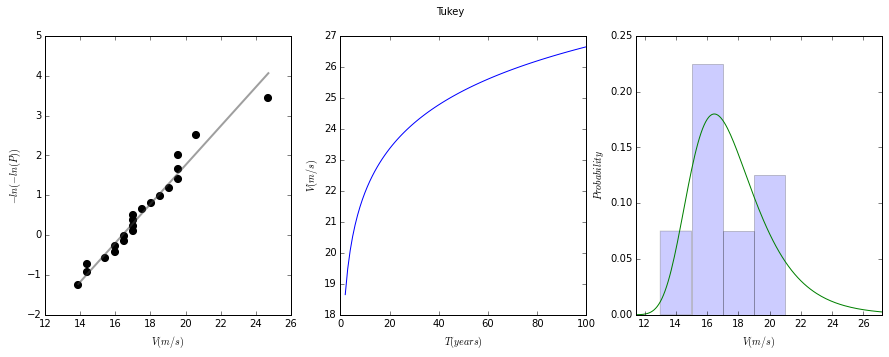

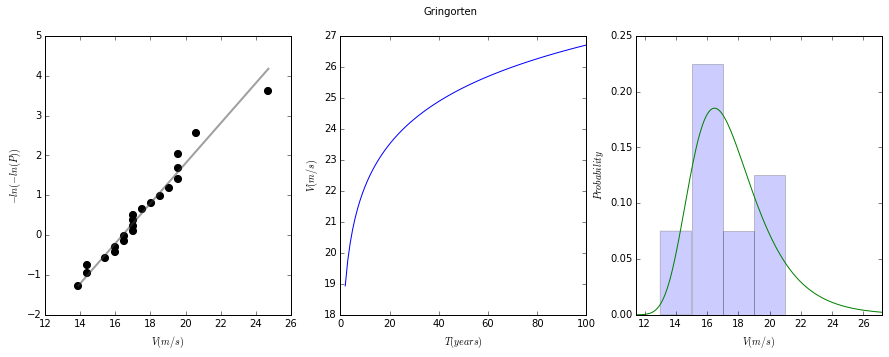

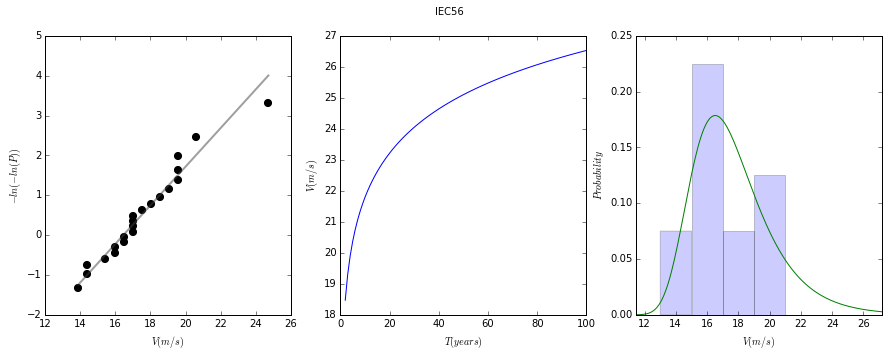

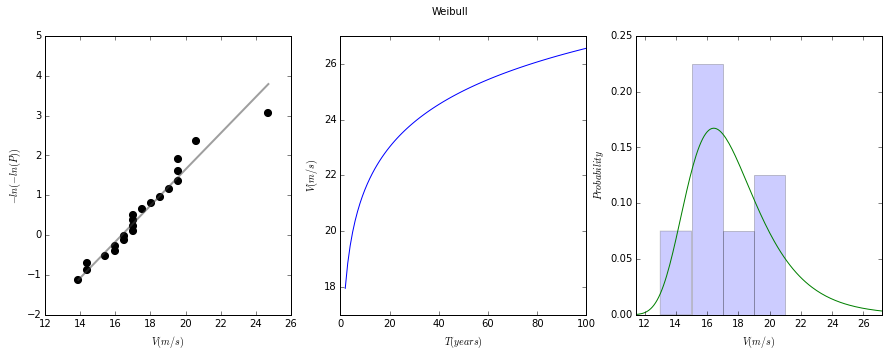

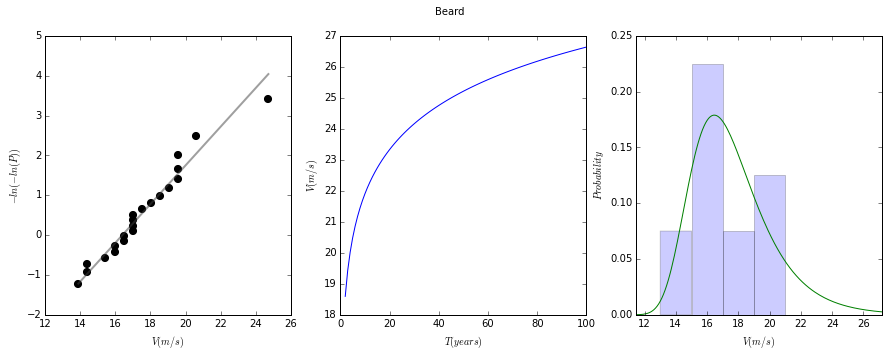

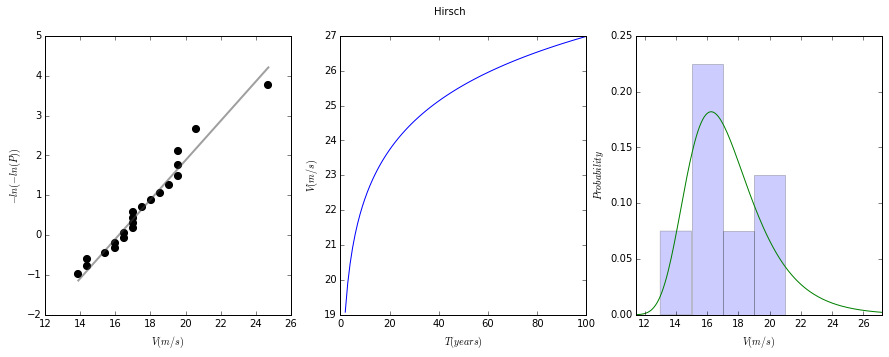

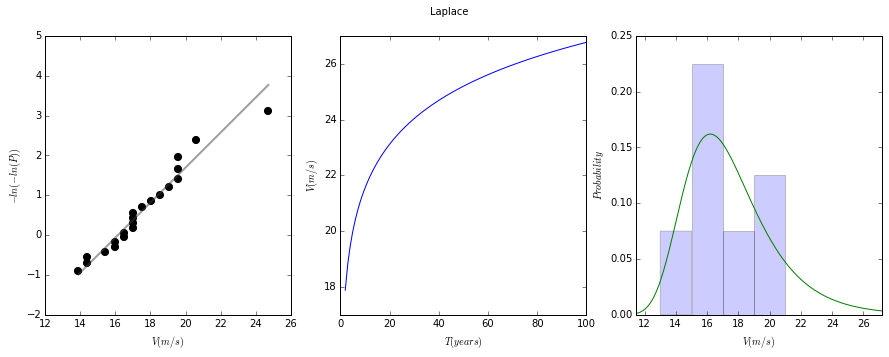

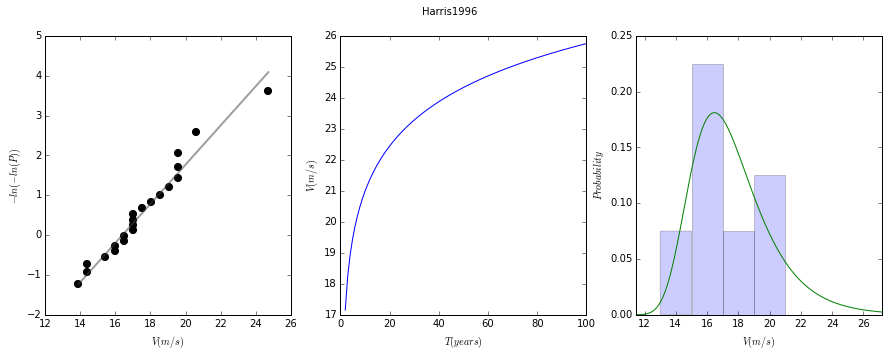

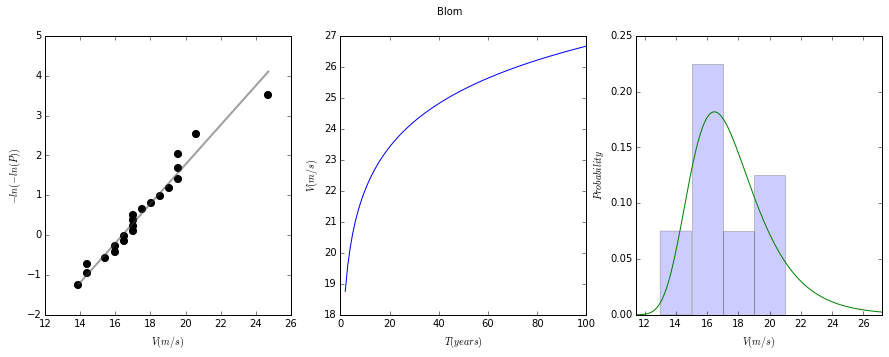

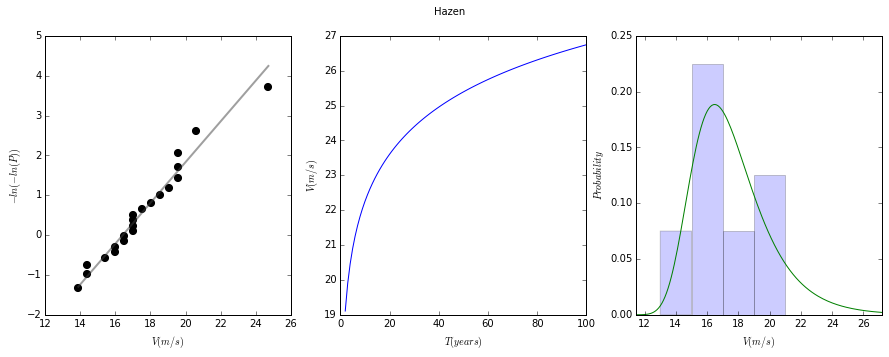

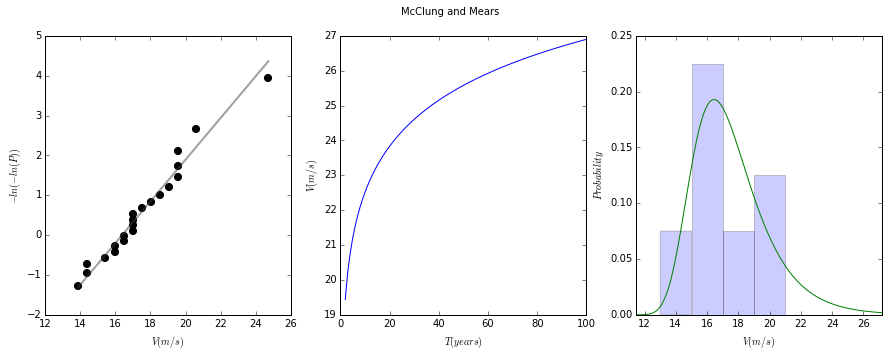

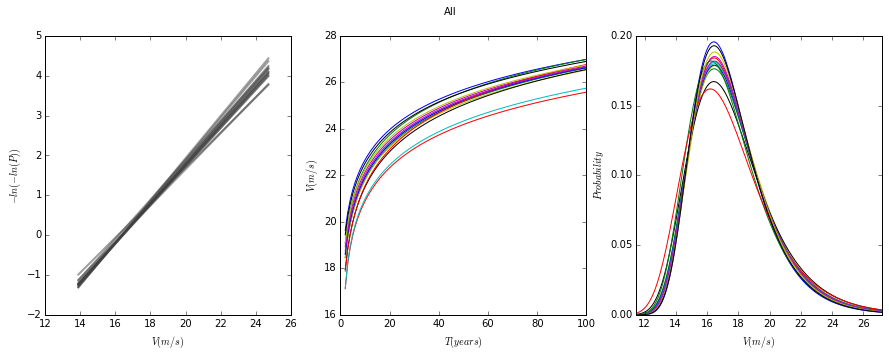

In [37]:
g = skextremes.standards.GumbelLiterature(data, preconditioning = 1)

g.ppp_all()

plt.figure(figsize=(12,8))
    
vs = np.empty((99, 14))
for i, key in enumerate(g.results.keys()):
    vref = g.results[key]['Wind speed for return period 2 to 100 years']
    vs[:,i] = vref
    g.plot_results(g.results[key]['data'],
                   g.results[key]['Wind speed for return period 2 to 100 years'],
                   g.results[key]['Y'],
                   g.results[key]['slope'],
                   g.results[key]['offset'],
                   key)
g.plot_results_summary()

A summary of all the return values.

(1, 101)

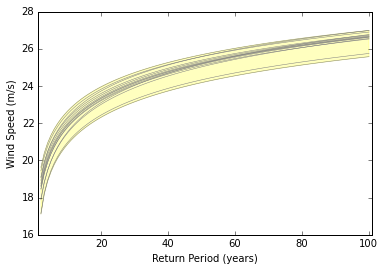

In [38]:
vsmax = vs.max(axis = 1)
vsmin = vs.min(axis = 1)
x = np.arange(len(vs[:,0])) + 2
for i in range(vs.shape[1]):
    plt.plot(x, vs[:,i], color = '0.5', lw = 0.5)
plt.fill_between(x, vsmin, vsmax, color = 'yellow', alpha = 0.25)
plt.xlabel('Return Period (years)')
plt.ylabel('Wind Speed (m/s)')
plt.xlim(1, 101)

# skextremes should be released in the near future with the basic functionality shown here (among other stuff) but first it need some refactoring and tests...